<a href="https://colab.research.google.com/github/OshidiWeerakulasuriya/User-interest-and-hotel-feature-identification-model/blob/main/TweetsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code reference - https://github.com/Opshou/twitterCluster/blob/master/Twitter%20clustering.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import re                                                       # regular expressions
import nltk                                                     # nlp library
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist
import itertools                                                # corpus creation
import collections                                              # word counter
import networkx  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GunasekeraHiran_tweets.csv', index_col=0)

In [4]:
tweets

,created_at,text
id,,
1324617054377291776,2020-11-06 07:38:10,Contact Tripavi for some of our great Easter v...
1322759695656865793,2020-11-01 04:37:41,The best roads trips in Sri Lanka 🇱🇰 #SriLanka...
1321669595653009409,2020-10-29 04:26:01,Explore some of Sri Lanka’s azure seas and pal...
1321051474785259522,2020-10-27 11:29:50,Kantale tanka #SriLanka #tripaviadventures #tr...
1321050817089028098,2020-10-27 11:27:13,Kantale tanka #SriLanka #StayHome #tripaviadve...
...,...,...
1146755492141850624,2019-07-04 12:19:49,Silva to bring in Sri Lankan team to play at S...
1146751885233270784,2019-07-04 12:05:29,We are delighted to announce that Tripavi is n...
1146750392983871488,2019-07-04 11:59:33,I'm delighted to inform you that we have offic...


In [5]:
df = pd.DataFrame(tweets.text)

In [6]:
import re
import nltk

# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 # keep only words
  #regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
  #x = x.str.replace(regex_pat, '', x)
  #x = re.compile(r'[^a-zA-Z\s]+', '', x)
  x = re.sub(r'^RT[\s]+', '', x)
  x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
  x = re.sub(r'#', '', x)
  x = re.sub(r'@[A-Za-z0–9]+', '', x) 
  return x

df['text'] = df['text'].apply(clean)

In [7]:
df

,text
id,
1324617054377291776,Contact Tripavi for some of our great Easter v...
1322759695656865793,The best roads trips in Sri Lanka 🇱🇰 SriLanka ...
1321669595653009409,Explore some of Sri Lanka’s azure seas and pal...
1321051474785259522,Kantale tanka SriLanka tripaviadventures trave...
1321050817089028098,Kantale tanka SriLanka StayHome tripaviadventu...
...,...
1146755492141850624,Silva to bring in Sri Lankan team to play at S...
1146751885233270784,We are delighted to announce that Tripavi is n...
1146750392983871488,I'm delighted to inform you that we have offic...


In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
# Looking for the number of sentences with specific keywords
counter = 0
for i in df.text:
    if (('love' in i or 'like' in i or 'amazing' in i or 'awesome' in i) 
    and ('beach' in i or 'sea' in i or 'waves' in i or 'ocean' in i or 'sand' in i or 'breeze' in i)):
        counter = counter + 1
#print("There's {} ({}%) queries related with asking about delays while on the plane".format(counter, round(float(counter)/len(dataset.text)*100, 3)))

In [11]:
counter

8

Insert a column 'NewId' from 0 onwards

In [23]:
df.insert(0, 'New_ID', range(0, 0 + len(df)))

,New_ID,NewID,id,text
0,0,0,1324617054377291776,Contact Tripavi for some of our great Easter v...
1,1,1,1322759695656865793,The best roads trips in Sri Lanka 🇱🇰 SriLanka ...
2,2,2,1321669595653009409,Explore some of Sri Lanka’s azure seas and pal...
3,3,3,1321051474785259522,Kantale tanka SriLanka tripaviadventures trave...
4,4,4,1321050817089028098,Kantale tanka SriLanka StayHome tripaviadventu...
...,...,...,...,...
544,544,544,1146755492141850624,Silva to bring in Sri Lankan team to play at S...
545,545,545,1146751885233270784,We are delighted to announce that Tripavi is n...
546,546,546,1146750392983871488,I'm delighted to inform you that we have offic...
547,547,547,1146727883005730816,"Take only memories and leave only footprints, ..."


remove a column

In [25]:
df = df.drop('NewID', 1)

In [27]:
df

,id,text
0,1324617054377291776,Contact Tripavi for some of our great Easter v...
1,1322759695656865793,The best roads trips in Sri Lanka 🇱🇰 SriLanka ...
2,1321669595653009409,Explore some of Sri Lanka’s azure seas and pal...
3,1321051474785259522,Kantale tanka SriLanka tripaviadventures trave...
4,1321050817089028098,Kantale tanka SriLanka StayHome tripaviadventu...
...,...,...
544,1146755492141850624,Silva to bring in Sri Lankan team to play at S...
545,1146751885233270784,We are delighted to announce that Tripavi is n...
546,1146750392983871488,I'm delighted to inform you that we have offic...
547,1146727883005730816,"Take only memories and leave only footprints, ..."


In [29]:
# Formatting tweets (replacing symbols, lowecase, splitting). No stemming (corpus is needed for word freq count).
corpus1 = []
for i in range(0, len(df)):
    tweet = df['text'][i]
    tweet = tweet.lower()
    tweet = tweet.replace(',', '').replace('.', '').replace('-', '').replace('!', '').replace(';', '')
    tweet = tweet.split()
    corpus1.append(tweet)

In [30]:
allWords = list(itertools.chain(*corpus1))

In [31]:
# Taking out stop words
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in allWords if not w in stop_words] 
filtered_sentence = [] 
for w in allWords: 
    if w not in stop_words: 
        filtered_sentence.append(w)

In [32]:
#Counting most used words
counts_no_urls = collections.Counter(filtered_sentence)
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(50),
                             columns=['words', 'count'])

clean_tweets_no_urls.head(20)

,words,count
0,tripavi,224
1,sri,191
2,srilanka,179
3,lanka,149
4,great,76
5,travel,75
6,best,61
7,amazing,60
8,yala,48
9,tour,47


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0, flags=flags)


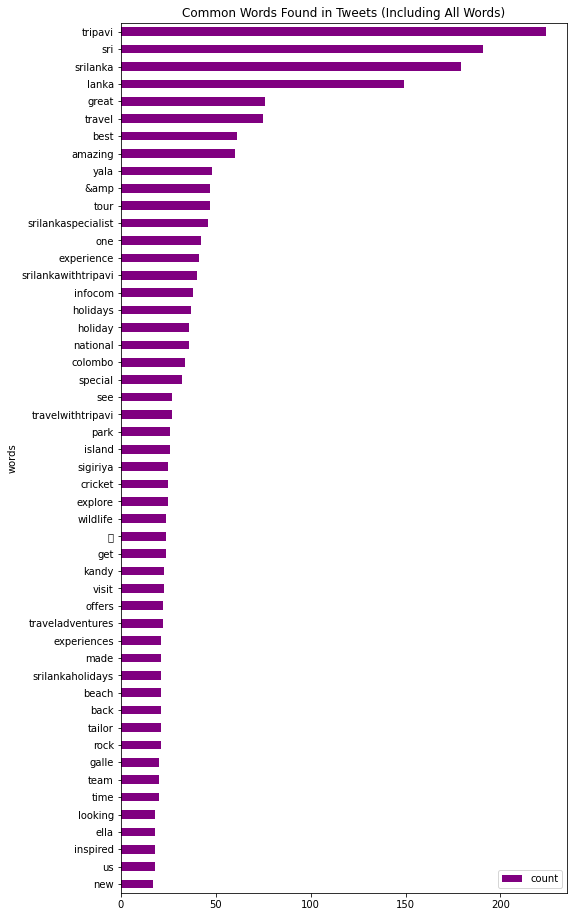

In [33]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [34]:
bigramsList = list(nltk.bigrams(filtered_sentence))
countsBigrams = collections.Counter(bigramsList)
bigrams1 = pd.DataFrame(countsBigrams.most_common(50),columns=['words', 'count'])
bigrams1.head(20)

,words,count
0,"(sri, lanka)",148
1,"(srilanka, tripavi)",25
2,"(📩, infocom)",23
3,"(national, park)",22
4,"(tripavi, srilanka)",19
5,"(tailor, made)",18
6,"(sri, lankan)",15
7,"(inspired, ideas)",15
8,"(yala, national)",12
9,"(srilankaspecialist, srilankawithtripavi)",12


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0, flags=flags)


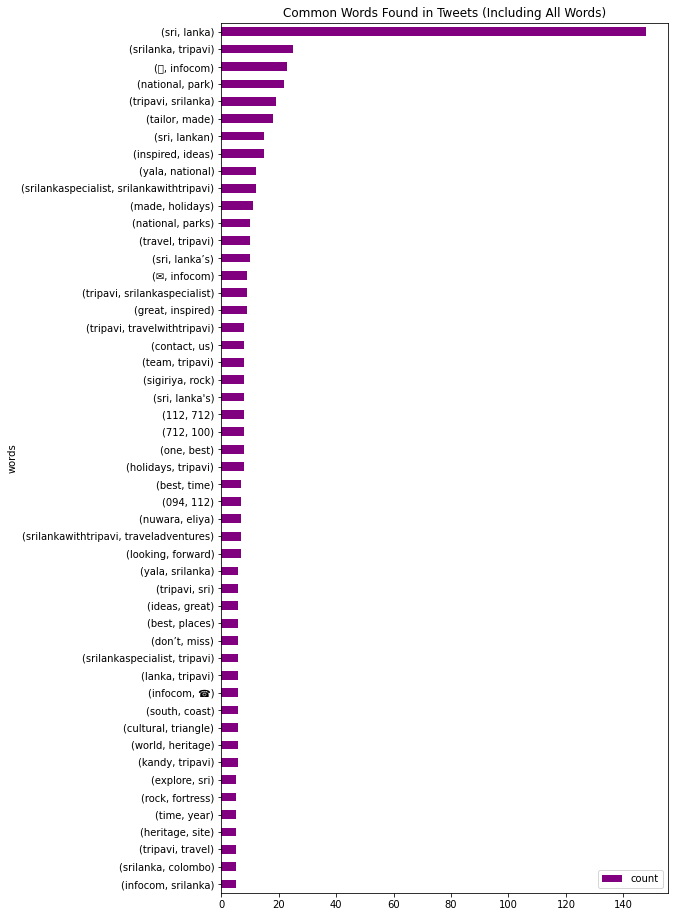

In [35]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
bigrams1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [36]:
trigramsList = list(nltk.trigrams(filtered_sentence))
countsTrigrams = collections.Counter(trigramsList)
countsTrigrams
trigrams1 = pd.DataFrame(countsTrigrams.most_common(50),
                             columns=['words', 'count'])
trigrams1.head(20)

,words,count
0,"(tailor, made, holidays)",11
1,"(yala, national, park)",10
2,"(great, inspired, ideas)",9
3,"(112, 712, 100)",8
4,"(094, 112, 712)",7
5,"(sri, lanka, tripavi)",6
6,"(inspired, ideas, great)",6
7,"(sigiriya, rock, fortress)",5
8,"(national, park, one)",5
9,"(infocom, ☎️, 094)",5


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128233 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127760 missing from current font.
  font.

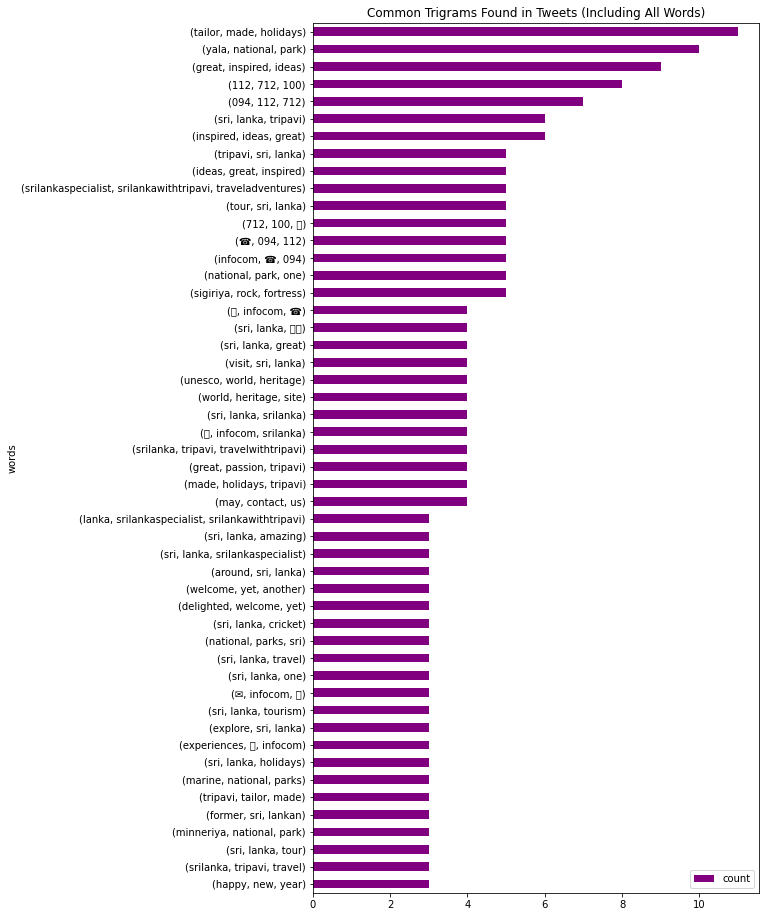

In [37]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 16))
trigrams1.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Trigrams Found in Tweets (Including All Words)")
plt.show()

In [38]:
# Filtering corpus, this time with stemmer (better for the cluster algorithm)
corpus = []
for i in range(0, len(df)):
    tweet = df['text'][i]
    tweet = tweet.lower()
    tweet = tweet.replace(',', '').replace('.', '').replace('-', '').replace('!', '').replace(';', '')
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet]
    loopVar = []
    for i in tweet:
        if i not in stop_words:
            loopVar.append(i)
    loopVar = ' '.join(loopVar)
    corpus.append(loopVar)

In [39]:
# Creating Bag of Words for clustering
cv = CountVectorizer(max_features = 20000)
X = cv.fit_transform(corpus).toarray()

In [40]:
true_k = 15 # set number of clusters as wished
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=15, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 end
 plain
 horton
 view
 escarp
 sri
 trail
 come
 walk
 hike
Cluster 1:
 sri
 lanka
 tripavi
 srilanka
 travel
 tour
 infocom
 great
 amp
 one
Cluster 2:
 travel
 tripavi
 comfort
 vehicl
 person
 detail
 differ
 equip
 amp
 ani
Cluster 3:
 tripavi
 visit
 place
 best
 sri
 lanka
 lion
 srilanka
 one
 sigiriya
Cluster 4:
 tripavi
 srilanka
 holiday
 travel
 experi
 best
 srilankaspecialist
 tour
 yala
 great
Cluster 5:
 look
 one
 travel
 inspir
 don
 sri
 handsom
 individu
 accompani
 whi
Cluster 6:
 cricket
 special
 tripavi
 museum
 delight
 visit
 srilankacricketteam
 part
 srilanka
 sri
Cluster 7:
 tour
 group
 tripavi
 look
 trip
 local
 dmc
 plan
 discount
 partner
Cluster 8:
 hill
 countri
 drive
 pass
 zone
 dri
 wet
 low
 srilanka
 raini
Cluster 9:
 holiday
 great
 tripavi
 custom
 client
 experi
 memori
 stori
 infocom
 make
Cluster 10:
 srilanka
 amaz
 thi
 great
 travel
 yala
 best
 colombo
 experi
 holiday
Cluster 11:
 buddha
 dambulla

In [42]:
labels = model.predict(X)
labels

array([ 4,  1,  1,  4, 10, 10,  1, 10,  4,  4,  4, 10, 10,  1,  1,  1, 10,
       10, 10, 10, 10,  4,  4, 10, 10, 10,  4,  4,  1, 10, 10,  4,  1,  1,
       10,  3, 10, 10, 10,  1, 10, 10,  1,  1, 10,  1, 10, 10,  1, 10,  1,
        1,  1,  1, 10,  4,  1,  1,  4,  1,  4, 10,  4, 10,  1,  1,  1,  1,
       10, 10,  4, 10, 10, 10,  1,  1,  1, 10, 10,  1, 10,  1,  1,  4, 10,
        1, 10,  1,  1, 10,  1, 10,  1, 10,  1, 10, 10, 10, 10,  1,  1, 10,
        1,  1, 10, 10,  4,  4,  4,  4,  1, 10, 10, 10,  1, 10, 11,  1,  4,
       10, 10, 10, 10, 10, 10,  1, 10, 10, 10, 10, 10, 10, 10,  1,  4,  4,
        1, 10, 10,  1, 10, 10,  1,  4, 10, 10, 10,  1, 10, 10,  4,  1, 10,
        4,  1, 10, 10,  1, 10,  4, 10, 10,  4, 10,  1,  1,  4,  4,  1,  4,
        1, 12,  1,  1, 10,  4, 10,  1, 10,  1, 10, 10,  4, 10,  4,  4,  4,
       10,  1,  1,  1,  9,  1,  4,  1, 10,  4, 10,  4,  4,  9, 10, 10,  4,
        1, 10, 10, 10,  1, 10, 10,  1, 10, 10, 14,  4,  1, 10,  1,  1, 10,
        4, 10, 10,  1, 10

In [44]:
clusteredTweets = pd.DataFrame(df.text)
clusteredTweets["cluster"] = pd.DataFrame(labels)

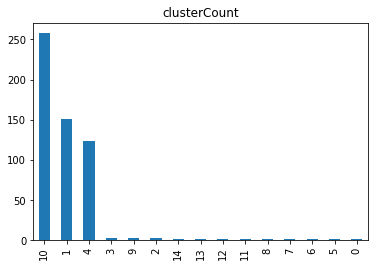

In [45]:
clusteredTweets.cluster.value_counts().plot(kind = 'bar', title = 'clusterCount')

In [46]:
# Getting the most representative tweet of each cluster
closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, X)

In [48]:
# Showing most representative tweet for each cluster and comparing to negative reason column
mostReprTweets = clusteredTweets.iloc[closest]
#mostReprTweets["negativereason"] = dataset.negativereason[closest]
mostReprTweets

,text,cluster
492,Sri Lanka is a amazing country for hikes with ...,0
276,Sri Lanka🤗,1
373,Tripavi is equipped with different types of ve...,2
341,Best Places to Visit in Sri Lanka with Tripavi...,3
412,SriLankaHolidays Tripavi,4
286,_soul Hi why don’t you do one to Sri Lanks☺️...,5
415,Sri Lanka Cricket 🏏 opens it’s first Cricket m...,6
304,"Planning on a group tour this winter, look no ...",7
327,"Belhuloya, the link pass within the dry and we...",8
191,Our great passion at tripavi is customer satis...,9
